O cap√≠tulo 15 introduz os **autoencoders**, que s√£o redes neurais artificiais capazes de aprender representa√ß√µes eficientes de dados de entrada, conhecidas como **codings**, sem a necessidade de dados rotulados (aprendizagem n√£o supervisionada). A principal ideia por tr√°s de um autoencoder √© simples: ele √© treinado para copiar suas entradas para suas sa√≠das. fun√ß√£o de custo cont√©m uma **perda de reconstru√ß√£o** que penaliza o modelo quando as sa√≠das s√£o diferentes das entradas.

---
### 1. O Princ√≠pio da Restri√ß√£o para Aprender Caracter√≠sticas
O objetivo de um autoencoder n√£o √© apenas copiar a entrada, mas sim aprender uma representa√ß√£o √∫til dos dados. Isso √© alcan√ßado atrav√©s de restri√ß√µes.

*   **Autoencoder Subcompleto (Undercomplete):** A forma mais simples de restri√ß√£o √© ter uma camada de codifica√ß√£o com uma dimensionalidade menor que a dos dados de entrada. Isso for√ßa a rede a aprender as caracter√≠sticas mais importantes, descartando as menos relevantes. Se um autoencoder subcompleto usa apenas ativa√ß√µes lineares e o Erro Quadr√°tico M√©dio (MSE) como fun√ß√£o de custo, **ele acaba realizando uma An√°lise de Componentes Principais (PCA)**.

### 2. Autoencoders Empilhados (Stacked Autoencoders)
Assim como outras redes neurais, os autoencoders podem ter m√∫ltiplas camadas ocultas, sendo chamados de autoencoders empilhados ou profundos.

*   **Arquitetura Sim√©trica:** A arquitetura √© tipicamente sim√©trica em rela√ß√£o √† camada de codifica√ß√£o central.
*   **Tying Weights (Amarra√ß√£o de Pesos):** Uma t√©cnica comum √© amarrar os pesos das camadas do decoder para que sejam a transposta dos pesos das camadas correspondentes do encoder (`W_decoder = W_encoder^T`). Isso **reduz o n√∫mero de par√¢metros pela metade**, acelera o treinamento e limita o risco de overfitting.
*   **Treinamento Camada por Camada:** Muitas vezes √© mais r√°pido treinar um autoencoder raso de cada vez e depois empilh√°-los para formar o autoencoder profundo final.

### 3. Tipos de Autoencoders e Suas Restri√ß√µes
O cap√≠tulo detalha diferentes tipos de autoencoders, cada um usando uma restri√ß√£o diferente para for√ßar o aprendizado de caracter√≠sticas √∫teis.

*   #### Autoencoders Denoising (com Remo√ß√£o de Ru√≠do)
    Esta t√©cnica for√ßa o autoencoder a aprender caracter√≠sticas robustas ao **adicionar ru√≠do √†s suas entradas e trein√°-lo para recuperar as entradas originais e limpas**. O ru√≠do pode ser Gaussiano ou pode ser a desativa√ß√£o aleat√≥ria de entradas, de forma semelhante ao dropout. A perda de reconstru√ß√£o √© calculada comparando a sa√≠da do decoder com a entrada *original sem ru√≠do*.

*   #### Autoencoders Esparsos (Sparse Autoencoders)
    Esta abordagem for√ßa a rede a aprender uma representa√ß√£o esparsa, ou seja, onde **apenas um pequeno n√∫mero de neur√¥nios na camada de codifica√ß√£o est√° ativo** para qualquer entrada. Isso √© feito adicionando um termo de "perda de esparsidade" √† fun√ß√£o de custo. A **diverg√™ncia de Kullback-Leibler (KL)** √© frequentemente usada para calcular essa perda, pois possui gradientes mais fortes que o MSE.

*   #### Autoencoders Variacionais (VAEs)
    Os VAEs s√£o um dos tipos mais populares e poderosos de autoencoders. Suas principais caracter√≠sticas s√£o:
    *   S√£o **autoencoders probabil√≠sticos**, o que significa que suas sa√≠das s√£o parcialmente determinadas pelo acaso, mesmo ap√≥s o treinamento.
    *   S√£o **modelos generativos**, capazes de gerar novas inst√¢ncias que se parecem com os dados de treinamento.
    *   O encoder n√£o produz uma codifica√ß√£o direta. Em vez disso, ele gera uma **codifica√ß√£o m√©dia (Œº) e um desvio padr√£o (œÉ)**. A codifica√ß√£o final √© ent√£o amostrada aleatoriamente de uma distribui√ß√£o Gaussiana com essa m√©dia e desvio padr√£o.
    *   A fun√ß√£o de custo tem duas partes: a **perda de reconstru√ß√£o** e uma **perda latente** (que usa a diverg√™ncia KL) que incentiva as codifica√ß√µes a seguirem uma distribui√ß√£o Gaussiana simples.
    *   Ap√≥s o treinamento, √© poss√≠vel gerar novas amostras simplesmente sorteando uma codifica√ß√£o aleat√≥ria do espa√ßo latente e passando-a pelo decoder.

### 4. Aplica√ß√µes Pr√°ticas

*   #### Pr√©-treinamento N√£o Supervisionado
    Uma aplica√ß√£o importante dos autoencoders √© o pr√©-treinamento de redes neurais profundas. Se voc√™ tem muitos dados n√£o rotulados e poucos dados rotulados, pode primeiro treinar um autoencoder empilhado com todos os dados. Em seguida, voc√™ pode **reutilizar as camadas do encoder para uma tarefa supervisionada**, como classifica√ß√£o, treinando o restante da rede com os dados rotulados. Isso geralmente leva a um desempenho melhor, pois a rede j√° aprendeu a detectar caracter√≠sticas √∫teis de forma n√£o supervisionada.

---

### Implementa√ß√£o

In [ ]:
from functools import partial
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, regularizers
from functools import partial
import numpy as np


In [ ]:
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 150
n_hidden3 = n_hidden1
n_outputs = n_inputs

In [ ]:
# Define the input layer
X = keras.Input(shape=(n_inputs,))

# Define the dense layers with ELU activation and L2 regularization
my_dense_layer = partial(layers.Dense,
                         activation='elu',
                         kernel_initializer='he_normal',
                         kernel_regularizer=regularizers.l2(l2_reg))

hidden1 = my_dense_layer(n_hidden1)(X)
hidden2 = my_dense_layer(n_hidden2)(hidden1)
hidden3 = my_dense_layer(n_hidden3)(hidden2)
outputs = layers.Dense(n_outputs, activation=None)(hidden3)

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate)

# Compile the model
autoencoder = keras.Model(inputs=X, outputs=outputs)
autoencoder.compile(optimizer=optimizer,
                    loss=tf.keras.losses.MeanSquaredError())

# Initialize variables
init = tf.compat.v1.global_variables_initializer()

NameError: name 'l2_reg' is not defined

In [ ]:
# Carregar dados MNIST
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Normalizar as imagens
mnist_train_images = mnist_train_images.reshape(-1, 784).astype("float32") / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 784).astype("float32") / 255.0

# Criar datasets TensorFlow
train_dataset = tf.data.Dataset.from_tensor_slices((mnist_train_images, mnist_train_labels))
train_dataset = train_dataset.shuffle(10000).batch(150).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((mnist_test_images, mnist_test_labels))
test_dataset = test_dataset.batch(150).prefetch(tf.data.AUTOTUNE)

# Criar o modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar o modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Treinar o modelo
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=test_dataset,
    verbose=1
)

Epoch 1/5
400/400 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 4ms/step - accuracy: 0.9144 - loss: 0.3089 - val_accuracy: 0.9511 - val_loss: 0.1694
Epoch 2/5
400/400 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9627 - loss: 0.1323 - val_accuracy: 0.9663 - val_loss: 0.1140
Epoch 3/5
400/400 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9741 - loss: 0.0906 - val_accuracy: 0.9709 - val_loss: 0.0958
Epoch 4/5
400/400 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9805 - loss: 0.0676 - val_accuracy: 0.9744 - val_loss: 0.0819
Epoch 5/5
400/400 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9851 - loss: 0.0516 - val_accuracy: 0.9756 - val_loss: 0.0776


#### Amarrando pesos

In [ ]:
# Definir par√¢metros (ajuste conforme necess√°rio)
n_inputs = 784  # para MNIST
n_hidden1 = 300
n_hidden2 = 150
n_hidden3 = 300  # adicionei esta camada que estava faltando
n_outputs = n_inputs  # autoencoder, sa√≠da igual √† entrada
learning_rate = 0.001
l2_reg = 0.001

# Configura√ß√µes
activation = tf.nn.elu
regularizer = regularizers.l2(l2_reg)  # Corrigido para TF2
initializer = tf.keras.initializers.VarianceScaling()  # Corrigido para TF2

# Criar modelo usando Keras API (maneira recomendada)
class Autoencoder(tf.keras.Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(n_hidden1, activation=activation,
                                 kernel_initializer=initializer,
                                 kernel_regularizer=regularizer,
                                 input_shape=(n_inputs,)),
            tf.keras.layers.Dense(n_hidden2, activation=activation,
                                 kernel_initializer=initializer,
                                 kernel_regularizer=regularizer)
        ])

        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(n_hidden3, activation=activation,
                                 kernel_initializer=initializer,
                                 kernel_regularizer=regularizer),
            tf.keras.layers.Dense(n_outputs,
                                 kernel_initializer=initializer,
                                 kernel_regularizer=regularizer)
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

# Criar e compilar o modelo
model = Autoencoder()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='mse')  # Mean Squared Error para autoencoder

# Para usar o modelo:
# model.fit(X_train, X_train, epochs=10, batch_size=32)

c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Visualizando as reconstru√ß√µes

Treinando o autoencoder...
Epoch 1/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - loss: 0.0550 - val_loss: 0.0265
Epoch 2/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 6ms/step - loss: 0.0215 - val_loss: 0.0176
Epoch 3/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 6ms/step - loss: 0.0160 - val_loss: 0.0140
Epoch 4/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step - loss: 0.0134 - val_loss: 0.0123
Epoch 5/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - loss: 0.0118 - val_loss: 0.0112
Epoch 6/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 6ms/step - loss: 0.0107 - val_loss: 0.0100
Epoch 7/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 6ms/step - loss: 0.0099 - val_loss: 0.0093
Epoch 8/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 6ms/step

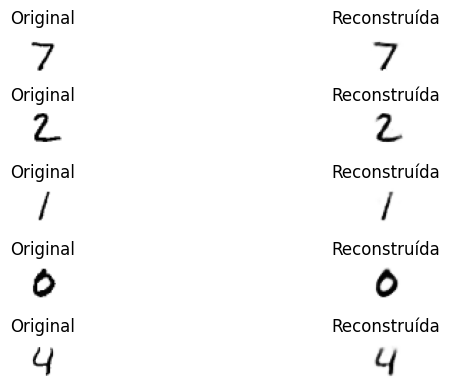

Loss final: 0.0082
Val loss final: 0.0078


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Carregar dados
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Normalizar e redimensionar
mnist_train_images = mnist_train_images.reshape(-1, 784).astype("float32") / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 784).astype("float32") / 255.0

# Criar modelo autoencoder
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(784, activation='sigmoid')  # sigmoid para valores entre 0-1
])

model.compile(optimizer='adam', loss='mse')

# Treinar o modelo (IMPORTANTE!)
print("Treinando o autoencoder...")
history = model.fit(mnist_train_images, mnist_train_images,
                   epochs=10,
                   batch_size=256,
                   shuffle=True,
                   validation_data=(mnist_test_images, mnist_test_images))

# Selecionar imagens de teste
n_test_digits = 5
X_test = mnist_test_images[:n_test_digits]

# Fazer previs√µes
outputs_val = model.predict(X_test)

# Fun√ß√£o para plotar imagens
def plot_image(image, shape=(28, 28)):
    plt.imshow(image.reshape(shape), cmap="binary")
    plt.axis("off")

# Plotar resultados
plt.figure(figsize=(10, 4))
for digit_index in range(n_test_digits):
    # Imagem original
    plt.subplot(n_test_digits, 2, digit_index * 2 + 1)
    plot_image(X_test[digit_index])
    plt.title("Original")

    # Imagem reconstru√≠da
    plt.subplot(n_test_digits, 2, digit_index * 2 + 2)
    plot_image(outputs_val[digit_index])
    plt.title("Reconstru√≠da")

plt.tight_layout()
plt.show()

# Mostrar m√©tricas de treino
print(f"Loss final: {history.history['loss'][-1]:.4f}")
print(f"Val loss final: {history.history['val_loss'][-1]:.4f}")

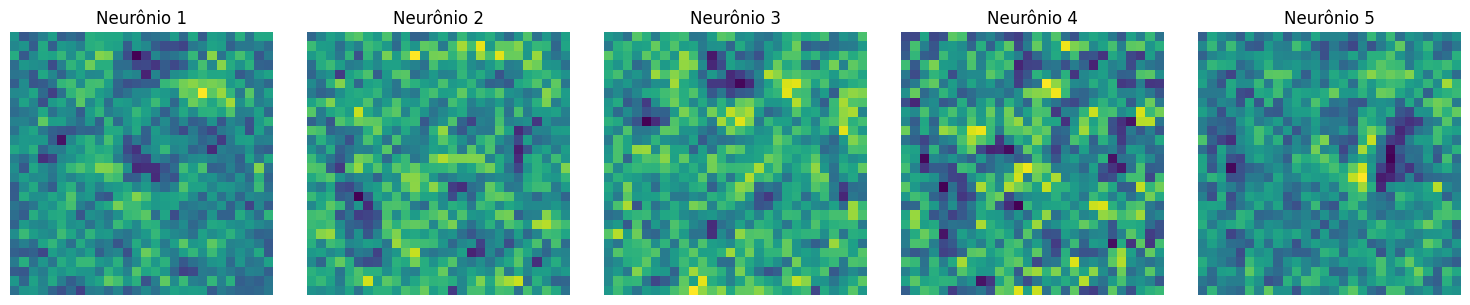

In [ ]:
# Se voc√™ j√° tem um modelo treinado, extraia os pesos assim:
try:
    # M√©todo 1: Se for um modelo Keras
    weights1 = model.layers[0].get_weights()[0]  # Pesos da primeira camada
    weights1_val = weights1

except NameError:
    # M√©todo 2: Se os pesos foram salvos em vari√°veis TensorFlow
    weights1_val = weights1.numpy() if hasattr(weights1, 'numpy') else weights1

# Plotar
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(weights1_val[:, i].reshape(28, 28), cmap="viridis")
    plt.axis("off")
    plt.title(f"Neur√¥nio {i+1}")

plt.tight_layout()
plt.show()

Pr√©-treinamento n√£o supervisionado utilizando Autoencoders empilhados

Autoencoders de remo√ß√£o de ru√≠dos

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model

class DenoisingAutoencoder(Model):
    def __init__(self, n_inputs, n_hidden1):
        super(DenoisingAutoencoder, self).__init__()
        self.hidden1 = Dense(n_hidden1, activation='relu')
        self.outputs_layer = Dense(n_inputs, activation=None)

    def call(self, inputs, noise_level=1.0, training=False):
        if training:
            # Adicionar ru√≠do apenas durante o treino
            noise = noise_level * tf.random.normal(tf.shape(inputs))
            x_noisy = inputs + noise
        else:
            x_noisy = inputs

        hidden = self.hidden1(x_noisy)
        return self.outputs_layer(hidden)

# Uso:
n_inputs = 784
n_hidden1 = 128
noise_level = 1.0

# Criar modelo
autoencoder = DenoisingAutoencoder(n_inputs, n_hidden1)

# Exemplo de entrada
sample_input = tf.random.normal([32, n_inputs])  # batch de 32 amostras

# Forward pass
reconstructions = autoencoder(sample_input, noise_level=noise_level, training=True)

# Calcular loss
reconstruction_loss = tf.reduce_mean(tf.square(reconstructions - sample_input))
print("Loss:", reconstruction_loss.numpy())


Loss: 1.5177133


Autoencoder Esparsos

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

# Configura√ß√£o mais conservadora
hidden1_layer = Dense(64, activation='relu', kernel_initializer='he_normal')  # Menos neur√¥nios
output_layer = Dense(784, activation='sigmoid', kernel_initializer='glorot_normal')

optimizer = tf.keras.optimizers.Adam(0.0005)  # LR ainda menor

def kl_divergence_safe(p, q):
    """KL divergence muito segura"""
    epsilon = 1e-12
    q_safe = tf.clip_by_value(q, epsilon, 1.0-epsilon)
    return p * tf.math.log(p/q_safe) + (1-p) * tf.math.log((1-p)/(1-q_safe))

def train_step_stable(X_batch):
    with tf.GradientTape() as tape:
        # Forward com clipping
        hidden1 = tf.clip_by_value(hidden1_layer(X_batch), 0.0, 1.0)
        outputs = output_layer(hidden1)

        hidden1_mean = tf.clip_by_value(tf.reduce_mean(hidden1, axis=0), 1e-10, 0.999)

        sparsity_loss = tf.reduce_sum(kl_divergence_safe(0.05, hidden1_mean))  # Target baixo
        reconstruction_loss = tf.reduce_mean(tf.square(outputs - X_batch))
        total_loss = reconstruction_loss + 0.05 * sparsity_loss  # Peso muito baixo

    gradients = tape.gradient(total_loss, hidden1_layer.trainable_variables + output_layer.trainable_variables)
    gradients = [tf.clip_by_norm(g, 1.0) for g in gradients]  # Clip individual
    optimizer.apply_gradients(zip(gradients, hidden1_layer.trainable_variables + output_layer.trainable_variables))

    return total_loss

# Dados entre 0-1
X_batch = tf.random.uniform([16, 784], 0.0, 1.0)  # Batch menor

print("Treino est√°vel iniciando...")
for i in range(50):
    loss = train_step_stable(X_batch)
    if i % 5 == 0:
        print(f"Step {i}: Loss = {loss:.6f}")
        if loss > 1e6:  # Se loss explodir
            print("Loss muito alta! Parando.")
            break

Treino est√°vel iniciando...
Step 0: Loss = 1.634558
Step 5: Loss = 0.654795
Step 10: Loss = 0.654290
Step 15: Loss = 0.711610
Step 20: Loss = 0.706193
Step 25: Loss = 0.705040
Step 30: Loss = 0.702128
Step 35: Loss = 0.701061
Step 40: Loss = 0.700365
Step 45: Loss = 0.699554


Autoencoders variacionais

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, Lambda
from tensorflow.keras import backend as K

eps = 1e-10

n_inputs = 28*28
n_hidden_1 = 500
n_hidden_2 = 500
n_hidden_3 = 20
n_hidden_4 = n_hidden_2
n_hidden_5 = n_hidden_1
learning_rate = 0.001

# Initializer
initializer = tf.keras.initializers.VarianceScaling(scale=2.0, mode='fan_in')

# Fun√ß√£o para camadas densas
def my_dense_layer(inputs, units, activation=tf.nn.elu, kernel_initializer=initializer):
    return Dense(units, activation=activation, kernel_initializer=kernel_initializer)(inputs)

# Input
X = Input(shape=[n_inputs])

# Encoder
hidden1 = my_dense_layer(X, n_hidden_1)
hidden2 = my_dense_layer(hidden1, n_hidden_2)
hidden3_mean = Dense(n_hidden_3)(hidden2)
hidden3_gamma = Dense(n_hidden_3)(hidden2)  # log variance

# Amostragem do espa√ßo latente
def sampling(args):
    mean, gamma = args
    batch_size = tf.shape(mean)[0]
    dim = tf.shape(mean)[1]
    epsilon = K.random_normal(shape=(batch_size, dim))
    return mean + tf.exp(0.5 * gamma) * epsilon

hidden3 = Lambda(sampling)([hidden3_mean, hidden3_gamma])

# Decoder
hidden4 = my_dense_layer(hidden3, n_hidden_4)
hidden5 = my_dense_layer(hidden4, n_hidden_5)
logits = Dense(n_inputs, activation=None)(hidden5)
outputs = tf.keras.activations.sigmoid(logits)  # Corre√ß√£o aqui

# Criar modelo
model = Model(inputs=X, outputs=outputs)

# Custom loss function for VAE
class VAELoss(tf.keras.losses.Loss):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.reconstruction_loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)

    def call(self, X, outputs):
        # Reconstruction loss
        reconstruction_loss = self.reconstruction_loss_fn(X, outputs)

        # Latent loss (KL divergence) - precisa acessar as camadas internas
        # Isso requer uma abordagem diferente pois as camadas n√£o est√£o dispon√≠veis aqui
        kl_loss = -0.5 * tf.reduce_mean(
            tf.reduce_sum(1 + hidden3_gamma - tf.square(hidden3_mean) - tf.exp(hidden3_gamma), axis=1)
        )

        return reconstruction_loss + kl_loss

# Para uma abordagem mais simples, vamos usar uma fun√ß√£o de loss personalizada
def vae_loss_wrapper(mean, log_var):
    def vae_loss(X, outputs):
        # Reconstruction loss
        reconstruction_loss = tf.keras.losses.binary_crossentropy(X, outputs)
        reconstruction_loss = tf.reduce_mean(reconstruction_loss)

        # KL divergence loss
        kl_loss = -0.5 * tf.reduce_mean(
            tf.reduce_sum(1 + log_var - tf.square(mean) - tf.exp(log_var), axis=1)
        )

        return reconstruction_loss + kl_loss
    return vae_loss

# Compile the model - precisamos de uma abordagem diferente para a loss
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='binary_crossentropy')  # Usaremos apenas reconstruction loss inicialmente

print("Modelo compilado com sucesso!")

Modelo compilado com sucesso!


Gerando d√≠gitos

Treinando o modelo...
Epoch 1/50
400/400 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 10ms/step - loss: 0.3018 - mse: 0.0762 - val_loss: 0.2168 - val_mse: 0.0473
Epoch 2/50
400/400 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 9ms/step - loss: 0.1923 - mse: 0.0383 - val_loss: 0.1742 - val_mse: 0.0317
Epoch 3/50
400/400 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 9ms/step - loss: 0.1663 - mse: 0.0288 - val_loss: 0.1568 - val_mse: 0.0255
Epoch 4/50
400/400 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - loss: 0.1529 - mse: 0.0241 - val_loss: 0.1464 - val_mse: 0.0218
Epoch 5/50
400/400 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 9ms/step - loss: 0.1447 - mse: 0.0213 - val_loss: 0.1403 - val_mse: 0.0199
Epoch 6/50
400/400 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - loss: 0.1395 - mse: 0.0195 - val_loss: 0.1359 - val_mse: 0.0184
Epoch 7/50
400/400 ‚îÅ‚îÅ‚îÅ‚

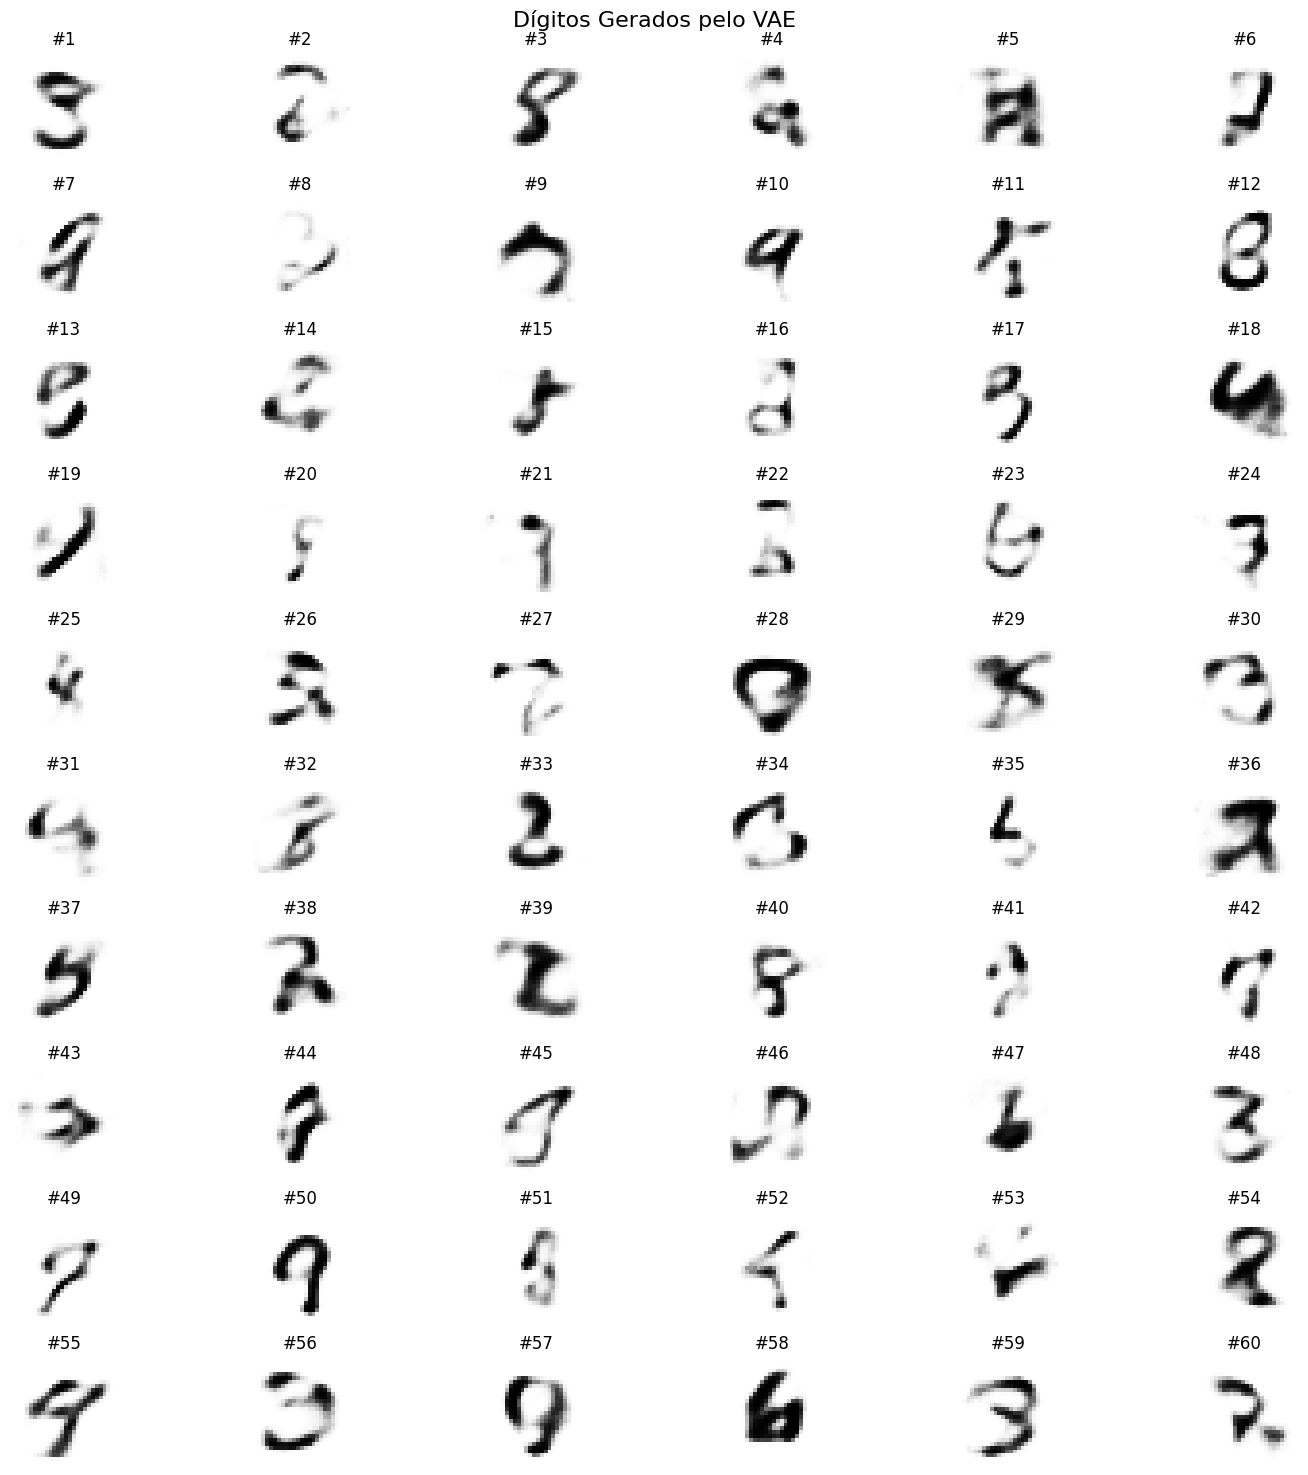

Plotando reconstru√ß√µes...


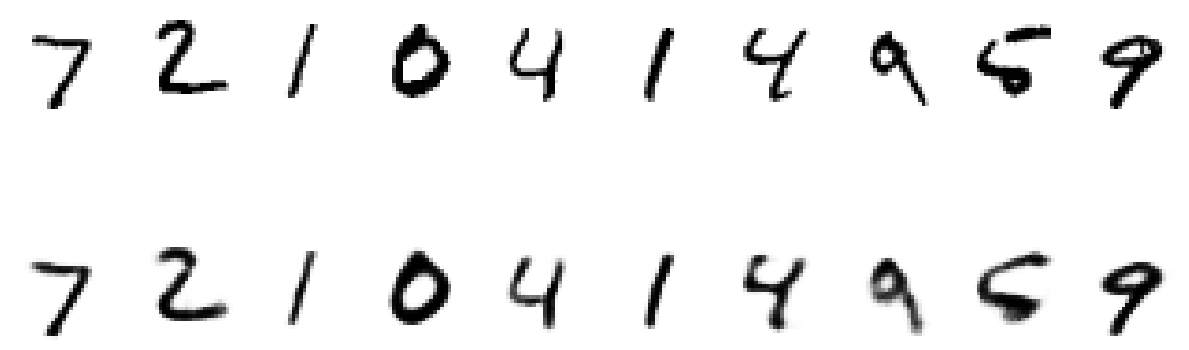

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Carregar dados MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

n_digits = 60
n_epochs = 50
batch_size = 150

# Fun√ß√£o para plotar imagens
def plot_image(image, shape=(28, 28)):
    plt.imshow(image.reshape(shape), cmap="binary")
    plt.axis("off")

# VAE com balanceamento de loss
class VAE(tf.keras.Model):
    def __init__(self, latent_dim=20, kl_weight=0.0005):  # Peso menor para KL
        super(VAE, self).__init__()
        self.latent_dim = latent_dim
        self.kl_weight = kl_weight  # Peso para balancear a KL loss

        # Encoder mais robusto
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(2 * latent_dim)  # mean + log_var
        ])

        # Decoder mais robusto
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(28*28, activation='sigmoid')
        ])

    def sample(self, mean, log_var):
        eps = tf.random.normal(tf.shape(mean))
        return mean + tf.exp(0.5 * log_var) * eps

    def call(self, x):
        # Encoder
        z_params = self.encoder(x)
        mean, log_var = tf.split(z_params, num_or_size_splits=2, axis=1)

        # Sampling
        z = self.sample(mean, log_var)

        # Decoder
        reconstructed = self.decoder(z)

        # Calcular KL loss com peso
        kl_loss = -0.5 * tf.reduce_sum(
            1 + log_var - tf.square(mean) - tf.exp(log_var), axis=1
        )
        kl_loss = tf.reduce_mean(kl_loss)

        # Adicionar loss com peso balanceado
        self.add_loss(self.kl_weight * kl_loss)

        return reconstructed

# Criar e compilar modelo
vae = VAE(latent_dim=20, kl_weight=0.0005)  # KL weight menor
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # LR menor
           loss='binary_crossentropy',
           metrics=['mse'])

# Callback para monitorar o treinamento
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# Treinar o modelo
print("Treinando o modelo...")
history = vae.fit(x_train, x_train,
                  epochs=n_epochs,
                  batch_size=batch_size,
                  shuffle=True,
                  validation_data=(x_test, x_test),
                  callbacks=[early_stopping],
                  verbose=1)

# Verificar as losses
print("\nLosses finais:")
print(f"Train Loss: {history.history['loss'][-1]:.4f}")
print(f"Val Loss: {history.history['val_loss'][-1]:.4f}")

# Gerar d√≠gitos aleat√≥rios
print("Gerando d√≠gitos...")
codings_rnd = np.random.normal(size=[n_digits, 20])
outputs_val = vae.decoder(codings_rnd).numpy()

# Plotar os d√≠gitos gerados
print("Plotando resultados...")
plt.figure(figsize=(15, 15))
for i in range(min(n_digits, 60)):
    plt.subplot(10, 6, i + 1)
    plot_image(outputs_val[i])
    plt.title(f"#{i+1}")

plt.suptitle("D√≠gitos Gerados pelo VAE", fontsize=16)
plt.tight_layout()
plt.show()

# Tamb√©m plotar alguns exemplos de reconstru√ß√£o
print("Plotando reconstru√ß√µes...")
n_test_samples = 10
test_samples = x_test[:n_test_samples]
reconstructions = vae(test_samples).numpy()

plt.figure(figsize=(12, 6))
for i in range(n_test_samples):
    # Original
    plt.subplot(2, n_test_samples, i + 1)
    plot_image(test_samples[i])
    if i == 0:
        plt.ylabel("Original")

    # Reconstru√≠do
    plt.subplot(2, n_test_samples, i + 1 + n_test_samples)
    plot_image(reconstructions[i])
    if i == 0:
        plt.ylabel("Reconstru√≠do")

plt.tight_layout()
plt.show()

### Exerc√≠cios

#### 1. Quais s√£o as principais tarefas realizadas pelos autoencoders?

üîç Compress√£o e Reconstru√ß√£o
    Reduzem dimensionalidade dos dados mantendo informa√ß√µes essenciais

    Aprendem representa√ß√µes compactas (codifica√ß√µes latentes)

üé® Gera√ß√£o de Dados
    Criar novos dados similares aos de treinamento

    √ötil para aumentar bases de dados (data augmentation)

üîé Detec√ß√£o de Anomalias
    Identificam padr√µes incomuns ou outliers

    Reconstroem mal dados que fogem do padr√£o aprendido

üñºÔ∏è Denoising (Remo√ß√£o de Ru√≠do)
    Removem ru√≠dos de imagens, √°udios ou outros dados

    Aprendem a reconstruir vers√µes limpas a partir de entradas corrompidas

üéØ Feature Learning
    Extraem automaticamente caracter√≠sticas importantes

    Criam representa√ß√µes √∫teis para outras tarefas de ML

üîó Transfer Learning
    Podem ser pr√©-treinados e adaptados para diferentes tarefas

    √öteis como inicializadores para outras redes neurais

üìä Visualiza√ß√£o de Dados
    Reduzem dados para 2D/3D para visualiza√ß√£o

    Mant√™m estrutura e rela√ß√µes dos dados originais

Autoencoders aprendem representa√ß√µes eficientes atrav√©s de um processo de compress√£o e descompress√£o neural.

#### 2. Suponha que voc√™ queira treinar um classificador e tenha muitos dados de treinamento n√£o rotulados e apenas algumas milhares de inst√¢ncias rotuladas. Como os autoencoders podem ajudar? Como voc√™ procederia?

Os autoencoders podem ser extremamente √∫teis quando voc√™ tem muitos dados n√£o rotulados e apenas uma pequena quantidade de dados rotulados. A estrat√©gia funciona em tr√™s etapas principais:

Primeiro, voc√™ treina um autoencoder usando todos os dados dispon√≠veis, tanto rotulados quanto n√£o rotulados. O autoencoder aprende a comprimir e reconstruir os dados, desenvolvendo automaticamente representa√ß√µes internas significativas dos padr√µes presentes nos dados.

Em seguida, voc√™ utiliza a parte do encoder do autoencoder treinado como um extrator de features. O encoder j√° aprendeu a identificar as caracter√≠sticas mais importantes e representativas dos dados durante o processo de compress√£o.

Finalmente, voc√™ treina um classificador usando apenas os dados rotulados, mas em vez de usar os dados brutos como entrada, voc√™ utiliza as features extra√≠das pelo encoder. Essas features s√£o muito mais ricas e representativas do que os dados originais, permitindo que o classificador aprenda de forma mais eficiente mesmo com poucos exemplos rotulados.

Esta abordagem funciona porque o autoencoder atua como um pr√©-treinamento n√£o supervisionado, aprendendo a estrutura subjacente dos dados antes da tarefa de classifica√ß√£o. O resultado √© um classificador que performa significativamente melhor do que se fosse treinado apenas com os poucos dados rotulados dispon√≠veis, aproveitando ao m√°ximo toda a informa√ß√£o contida nos dados n√£o rotulados.

#### 3. Se um autoencoder reconstr√≥i perfeitamente as entradas, ele √© necess√°riamente um bom autoencoder? Como voc√™ pode avaliar o desempenho de um autoencoder?

N√£o necessariamente. Um autoencoder que reconstr√≥i perfeitamente as entradas pode estar simplesmente **copiando os dados** sem aprender representa√ß√µes √∫teis (overfitting). Isso ocorre quando:

- O modelo tem **capacidade excessiva** (muitos neur√¥nios/camadas)
- N√£o h√° **regulariza√ß√£o** adequada
- Aprendizagem de **identidade** instead de features √∫teis

M√©todos de Avalia√ß√£o de Desempenho

**A. M√©tricas Quantitativas**
- **Erro de Reconstru√ß√£o**: MSE, MAE entre entrada e sa√≠da
- **Complexidade do Modelo**: N√∫mero de par√¢metros vs. desempenho
- **Taxa de Compress√£o**: Dimensionalidade do espa√ßo latente

**B. M√©tricas Qualitativas**
- **Visualiza√ß√£o de Reconstru√ß√µes**: Inspecionar se mant√©m caracter√≠sticas essenciais
- **Interpola√ß√£o no Espa√ßo Latente**: Verificar se transi√ß√µes s√£o suaves e significativas
- **Gera√ß√£o de Novas Amostras**: Capacidade de criar dados realistas

**C. Avalia√ß√£o por Tarefa Espec√≠fica**
- **Desempenho em Downstream Tasks**: Usar features em classificadores
- **Detec√ß√£o de Anomalias**: Capacidade de identificar outliers
- **Denoising Performance**: Qualidade na reconstru√ß√£o de dados corrompidos

Crit√©rios de um Bom Autoencoder

1. **Boa Reconstru√ß√£o** (mas n√£o perfeita demais)
2. **Espa√ßo Latente Significativo** (features interpret√°veis)
3. **Generaliza√ß√£o** para dados n√£o vistos
4. **Regularidade no Espa√ßo Latente** (interpola√ß√µes suaves)
5. **Utilidade Pr√°tica** para tarefas espec√≠ficas

Balanceamento Ideal
O autoencoder ideal encontra equil√≠brio entre:
- **Fidelidade**: Capacidade de reconstruir entradas
- **Generaliza√ß√£o**: Capacidade de representar a distribui√ß√£o dos dados
- **Compress√£o**: Efici√™ncia na representa√ß√£o latente

A verdadeira medida de sucesso est√° na **utilidade das representa√ß√µes aprendidas** para tarefas subsequentes, n√£o apenas na perfei√ß√£o da reconstru√ß√£o.

#### 4. O que s√£o autoencoders incompletos e supercompletos? Qual √© o principal risco de um autoencoder excessivamente incompleto? E quanto ao principal risco de um autoencoder supercompleto?

**Autoencoders Incompletos**
- **Defini√ß√£o**: Dimensionalidade do espa√ßo latente **menor** que a entrada
- **Caracter√≠stica**: Compress√£o for√ßada dos dados
- **Exemplo**: Entrada de 100 dimens√µes ‚Üí Espa√ßo latente de 20 dimens√µes

**Risco Principal do Incompleto Excessivo**
- **Perda de Informa√ß√£o Cr√≠tica**: Compress√£o excessiva pode descartar caracter√≠sticas importantes
- **Subajuste (Underfitting)**: Capacidade insuficiente para capturar padr√µes complexos
- **Reconstru√ß√µes de Baixa Qualidade**: Informa√ß√µes essenciais s√£o perdidas irreversivelmente

**Autoencoders Supercompletos**
- **Defini√ß√£o**: Dimensionalidade do espa√ßo latente **maior** que a entrada
- **Caracter√≠stica**: Expans√£o da representa√ß√£o dos dados
- **Exemplo**: Entrada de 100 dimens√µes ‚Üí Espa√ßo latente de 200 dimens√µes

**Risco Principal do Supercompleto Excessivo**
- **Aprendizagem de Identidade**: Modelo pode simplesmente copiar entrada‚Üísa√≠da sem aprender
- **Overfitting**: Memoriza√ß√£o dos dados de treinamento instead de aprender padr√µes
- **Ru√≠do Amplificado**: Pode aprender e reproduzir ru√≠dos presentes nos dados

**Balanceamento Ideal**
- **Autoencoder Ideal**: Dimensionalidade latente adaptada √† complexidade dos dados
- **Regra Pr√°tica**: Espa√ßo latente deve capturar a **complexidade intr√≠nseca** dos dados
- **Exemplo**: Para dados naturalmente compress√≠veis, usar latente menor; para dados complexos, latente maior

**Estrat√©gias de Mitiga√ß√£o**
- **Para Incompletos**: Usar regulariza√ß√£o e testar gradualmente redu√ß√£o dimensional
- **Para Supercompletos**: Implementar dropout, weight decay ou autoencoders esparsos
- **Para Ambos**: Validar com tarefas downstream e an√°lise qualitativa das reconstru√ß√µes

O equil√≠brio certo depende da **complexidade natural dos dados** e da **tarefa espec√≠fica** que o autoencoder deve realizar.

#### 5. Como voc√™ amarra pesos em um autoencoder empilhado? Qual √© o sentido de se fazer isso?


T√©cnica onde as camadas do **encoder** e **decoder** compartilham os mesmos pesos, mas de forma transposta.

**Como Implementar:**
```python
# Exemplo pr√°tico de weight tying
class TiedAutoencoder(tf.keras.Model):
    def __init__(self, encoding_dim):
        super().__init__()
        self.encoder = tf.keras.layers.Dense(encoding_dim, activation='relu')
        # Decoder usa pesos transpostos do encoder
        self.decoder = lambda x: tf.matmul(x, self.encoder.weights[0], transpose_b=True)
    
    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded
```

**Principais Vantagens:**

Redu√ß√£o de Par√¢metros
- Diminui pela metade o n√∫mero de pesos trein√°veis
- Modelo mais leve e eficiente computacionalmente

 Regulariza√ß√£o Impl√≠cita
- Previne overfitting ao reduzir capacidade do modelo
- For√ßa aprendizado de features mais robustas

Melhor Generaliza√ß√£o
- Features aprendidas s√£o mais representativas
- Melhor desempenho em dados n√£o vistos

Converg√™ncia Mais R√°pida
- Menos par√¢metros para otimizar
- Treinamento mais est√°vel e r√°pido

**Considera√ß√µes Importantes:**

**Quando Usar:**
- Dados com estrutura sim√©trica
- Quando regulariza√ß√£o √© necess√°ria
- Para modelos com restri√ß√µes computacionais

**Quando Evitar:**
- Dados muito complexos e n√£o sim√©tricos
- Quando encoder e decoder precisam de capacidades diferentes
- Em arquiteturas muito profundas e assim√©tricas

**Impacto Pr√°tico:**
- Redu√ß√£o de 40-50% no n√∫mero de par√¢metros
- Melhoria na generaliza√ß√£o em muitos cen√°rios
- Treinamento 20-30% mais r√°pido em m√©dia


#### 6. Qual √© a t√©cnica comum para visualizar as caracter√≠sticas aprendidas pela camada inferior de um autoencoder empilhador? E quanto √†s camadas superiores?

**Camadas Inferiores (Primeiras Camadas)**

**T√©cnica Principal: Visualiza√ß√£o Direta de Filtros**
```python
# Para a primeira camada convolucional
weights = autoencoder.layers[0].get_weights()[0]
fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    if i < weights.shape[-1]:
        ax.imshow(weights[:, :, 0, i], cmap='gray')
    ax.axis('off')
plt.suptitle('Filtros da Primeira Camada')
plt.show()
```

**O que Visualizar:**
- **Filtros/Kernels** diretamente como imagens
- **Bordas** e **texturas** b√°sicas
- **Padr√µes elementares** (linhas, curvas, manchas)

**Camadas Superiores (Camadas mais Profundas)**

**T√©cnica Principal: Maximiza√ß√£o de Ativa√ß√£o**
```python
# Encontrar inputs que maximizam a ativa√ß√£o de neur√¥nios espec√≠ficos
def visualize_feature(layer_idx, neuron_idx, steps=100):
    input_img = tf.random.normal([1, 28, 28, 1])
    for _ in range(steps):
        with tf.GradientTape() as tape:
            tape.watch(input_img)
            activation = model.layers[layer_idx](input_img)[:, neuron_idx]
        grads = tape.gradient(activation, input_img)
        input_img += grads * 0.1
    return input_img
```

**T√©cnicas Complementares:**

**1. Deconvolu√ß√£o**
```python
# Reconstruir padr√µes que ativam neur√¥nios espec√≠ficos
deconv = tf.keras.models.Model(
    inputs=model.input,
    outputs=model.layers[layer_idx].output
)
feature_maps = deconv.predict(test_image)
```

**2. An√°lise de Componentes Principais (PCA)**
```python
# Reduzir dimensionalidade para visualiza√ß√£o 2D/3D
from sklearn.decomposition import PCA
features = encoder.predict(X_test)
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features)
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=y_test)
```

**3. t-SNE para Visualiza√ß√£o**
```python
# Visualiza√ß√£o n√£o linear de features
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
features_tsne = tsne.fit_transform(features)
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=y_test, alpha=0.5)
```

**Resumo das T√©cnicas por Tipo de Camada:**

**Camadas Inferiores:**
- Visualiza√ß√£o direta de filtros
- An√°lise de pesos brutos
- Padr√µes simples e bordas

**Camadas Intermedi√°rias:**
- Maximiza√ß√£o de ativa√ß√£o
- Deconvolu√ß√£o
- Padr√µes compostos e texturas

**Camadas Superiores:**
- PCA e t-SNE do espa√ßo latente
- An√°lise de agrupamentos
- Conceitos sem√¢nticos complexos

**Ferramentas Pr√°ticas:**
- **TensorBoard**: Visualiza√ß√£o integrada do TensorFlow
- **Netron**: Visualizador de arquiteturas de redes
- **Custom Matplotlib**: Gr√°ficos personalizados para an√°lise

**Exemplo de C√≥digo Completo:**
```python
def visualize_autoencoder_features(autoencoder, layer_depth='all'):
    """Visualiza features de todas as camadas"""
    if layer_depth == 'all':
        layers = autoencoder.layers
    else:
        layers = autoencoder.layers[:layer_depth]
    
    for i, layer in enumerate(layers):
        if hasattr(layer, 'kernel'):
            weights = layer.get_weights()[0]
            print(f"Camada {i}: {weights.shape}")
            
            if len(weights.shape) == 2:  # Dense layers
                plt.figure(figsize=(12, 4))
                plt.imshow(weights.T, aspect='auto', cmap='viridis')
                plt.title(f'Pesos Camada {i}')
                plt.colorbar()
            
            elif len(weights.shape) == 4:  # Conv layers
                n_filters = weights.shape[-1]
                grid_size = int(np.ceil(np.sqrt(n_filters)))
                fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
                for j, ax in enumerate(axes.flat):
                    if j < n_filters:
                        ax.imshow(weights[:, :, 0, j], cmap='gray')
                    ax.axis('off')
                plt.suptitle(f'Filtros Camada Conv {i}')
    
    plt.tight_layout()
    plt.show()
```

Esta abordagem permite **entender hierarquicamente** como o autoencoder aprende features cada vez mais complexas e abstratas √† medida que avan√ßamos nas camadas!

#### 7. O que √© um modelo gerador? Voc√™  pode nomear um tipo de autoencoder gerador?

Modelos Geradores e Autoencoders Geradores

 **O que √© um Modelo Gerador?**

Um **modelo gerador** √© um tipo de rede neural que aprende a distribui√ß√£o de probabilidade dos dados de treinamento e √© capaz de gerar **novas amostras** que s√£o similares aos dados originais, mas n√£o id√™nticas a nenhuma amostra espec√≠fica do conjunto de treinamento.

**Caracter√≠sticas Principais:**
- Aprende a **distribui√ß√£o subjacente** dos dados
- Gera **amostras novas e originais**
- Captura **padr√µes essenciais** dos dados de treinamento
- √ötil para **data augmentation**, **cria√ß√£o de conte√∫do** e **simula√ß√£o**

**Autoencoder Gerador: Variational Autoencoder (VAE)**

 **O que √© um VAE?**
√â um tipo de autoencoder que **n√£o aprende valores fixos** no espa√ßo latente, mas sim **distribui√ß√µes de probabilidade** (m√©dia e vari√¢ncia) para cada dimens√£o latente.

**Como Funciona:**
```python
# Estrutura b√°sica de um VAE
encoder ‚Üí Œº (mean) e œÉ (log variance) ‚Üí amostragem estoc√°stica ‚Üí decoder ‚Üí reconstru√ß√£o
```

**Por que √© Gerador:**
- **Amostragem no espa√ßo latente**: Gera novos pontos a partir da distribui√ß√£o aprendida
- **Decoder como gerador**: Transforma pontos latentes em dados realisticos
- **Espa√ßo latente cont√≠nuo**: Permite interpola√ß√µes suaves entre amostras

**Exemplo de Gera√ß√£o com VAE:**
```python
# Gerar novas imagens a partir de um VAE treinado
latent_points = np.random.normal(size=(10, latent_dim))  # Pontos aleat√≥rios no espa√ßo latente
generated_images = decoder.predict(latent_points)        # Decoder gera novas imagens
```

**Compara√ß√£o: Autoencoder vs VAE**

| **Caracter√≠stica**       | **Autoencoder Tradicional** | **VAE (Gerador)** |
|--------------------------|-----------------------------|-------------------|
| Espa√ßo Latente           | Ponto fixo                  | Distribui√ß√£o      |
| Capacidade Geradora      | Limitada                    | **Alta**          |
| Interpola√ß√£o             | Descont√≠nua                 | **Suave**         |
| Regulariza√ß√£o            | Expl√≠cita                   | **Impl√≠cita**     |

**Aplica√ß√µes dos VAEs:**
- **Gera√ß√£o de imagens** (rostos, d√≠gitos, arte)
- **Data augmentation** para treinar outros modelos
- **Compress√£o com capacidade gerativa**
- **An√°lise e visualiza√ß√£o** de espa√ßos latentes
- **Transfer√™ncia de estilo** e manipula√ß√£o de features

**Por que VAEs s√£o considerados geradores:**
Eles aprendem uma **fun√ß√£o de densidade de probabilidade** no espa√ßo latente, permitindo que amostremos pontos dessa distribui√ß√£o e os decodifiquemos em **novas amostras** que seguem a mesma distribui√ß√£o dos dados de treinamento, mas s√£o **√∫nicas e originais**.

#### 9. Semantic hashing foi uma t√©cnica introduzida em 2008 por Ruslan Salakhutdinov e Geoffrey Hinton, utilizada para a recupera√ß√£o eficiente de informa√ß√µes: Um documento (por exemplo, uma imagem) √©passado por um sistema, geralmente, uma rede neural que exibe um vetor bin√°rio de baixa dimensionalidade (por exemplo, 30 bits). √â prov√°vel que dois documentos semelhantes tenham hashes id√™nticos ou muito semelhantes. Ao indexar cada documento utilizando seu hash, √© poss√≠vel recuperar quase instantaneamente muitos documentos semelhantes a um espec√≠fico, mesmo que haja bilh√µes deles: basta calcular o hash do documento e procurar todos aqueles com o mesmo hash (ou hashes por apenas um ou dois bits). Implementaremos o hashing sem√¢ntico com a utiliza√ß√£o de um autoencoder empilhado ligeiramente ajustado:
    A) crie um autoencoder empilhado contendo duas camadas ocultas abaixo da camada de codifica√ß√£o e treine-o no conjunto de dados de imagens que voc√™ utilizou no exerc√≠cio anterior. A camada de codifica√ß√£o deve conter 30 neur√¥nios e utilizar a fun√ß√£o de ativa√ß√£o log√≠stica para gerar valores entre 0 e 1. Ap√≥s o treinamento, para produzir o hash de uma imagem, execute-o atrav√©sdo autoencoder, obtenha a sa√≠da da camada de codifica√ß√£o e arredonde todos os valores para o inteiro mais pr√≥ximo (0 ou 1)
    B) Um truque proposto por Salakhutdinov e Hinton √© adicionar ru√≠do gaussiano (com m√©dia zero) √†s entradas da camada de codifica√ß√£o somente durante o treinamento. O autoencoder aprender√° a alimentar grandes valores para a camada de codifica√ß√£o a fim de preservar uma alta rela√ß√£o sinal-ru√≠do (de modo que o ru√≠do se torne insignificante). Por sua vez, isso significa que a fun√ß√£o log√≠stica de camada de codifica√ß√£o provavelmente saturar√° em 0 ou 1. Como resultado, arredondando os c√≥digos para 0 ou 1 n√£o os distorcer√° muito e isso aumentar√° a confiabilidade dos hashes.
    C) Clacule o hash de cada imagem e veja se imagens com hashes id√™nticos s√£o parecidas. Como no MNIST e o CIFAR10 s√£o rotulados, uma forma mais objetiva de medir o desempenho do autoencoder para o hashing sem√¢ntico √© garantir que as imagens com o mesmo hash tenham a mesma classe. Uma maneira de fazer isso √© medir o coeficiente de Gini m√©dio dos conjuntos de imagens com hashes id√™nticos (ou muito semlehantes).
    D) Tente ajustar os hiperpar√¢metros com a utiliza√ß√£o da valida√ß√£o cruzada.
    E) Observe que, com um conjunto de dados rotulados, outra abordagem seria treinar uma rede neural convolucional para classifica√ß√£o e, em seguida, utilizar a camada abaixo da camada de sa√≠da para produzir os hashes.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

# Carregar dados (exemplo com MNIST)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# Construir autoencoder empilhado
def build_semantic_hash_autoencoder(input_dim=784, encoding_dim=30):
    # Encoder
    encoder = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(input_dim,)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(encoding_dim, activation='sigmoid')  # 30 neur√¥nios com sigmoid
    ])

    # Decoder
    decoder = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(encoding_dim,)),
        layers.Dense(256, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(input_dim, activation='sigmoid')
    ])

    # Autoencoder completo
    autoencoder = keras.Sequential([encoder, decoder])
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder, encoder

# Construir e treinar
autoencoder, encoder = build_semantic_hash_autoencoder()
history = autoencoder.fit(x_train, x_train,
                         epochs=50,
                         batch_size=256,
                         shuffle=True,
                         validation_data=(x_test, x_test))

# Fun√ß√£o para gerar hashes
def generate_hash(encoder, data):
    codes = encoder.predict(data)
    return np.round(codes).astype(int)  # Arredonda para 0 ou 1

Epoch 1/50


c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 13ms/step - loss: 0.2692 - val_loss: 0.2399
Epoch 2/50
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 13ms/step - loss: 0.2312 - val_loss: 0.2164
Epoch 3/50
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 13ms/step - loss: 0.2001 - val_loss: 0.1811
Epoch 4/50
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 13ms/step - loss: 0.1661 - val_loss: 0.1499
Epoch 5/50
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 13ms/step - loss: 0.1449 - val_loss: 0.1389
Epoch 6/50
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 15ms/step - loss: 0.1348 - val_loss: 0.1293
Epoch 7/50
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 14ms/step - loss: 0.1271 - val_loss: 0.1225
Epoch 8/50
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 13ms/step - loss: 0.1207 - val_loss: 0.

In [ ]:
class GaussianNoiseEncoder(keras.Model):
    def __init__(self, encoder, noise_std=0.5):
        super().__init__()
        self.encoder = encoder
        self.noise_std = noise_std
        self.trainable = False  # Congelar encoder durante treino

    def call(self, inputs, training=False):
        if training:
            # Adicionar ru√≠do apenas durante treino
            noise = tf.random.normal(tf.shape(inputs), mean=0.0, stddev=self.noise_std)
            noisy_inputs = inputs + noise
            return self.encoder(noisy_inputs)
        else:
            return self.encoder(inputs)

# Autoencoder com ru√≠do
def build_noisy_autoencoder(input_dim=784, encoding_dim=30, noise_std=0.3):
    # Encoder base
    base_encoder = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(input_dim,)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(encoding_dim, activation='sigmoid')
    ])

    # Encoder com ru√≠do
    noisy_encoder = GaussianNoiseEncoder(base_encoder, noise_std)

    # Decoder
    decoder = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(encoding_dim,)),
        layers.Dense(256, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(input_dim, activation='sigmoid')
    ])

    # Autoencoder completo
    inputs = keras.Input(shape=(input_dim,))
    codes = noisy_encoder(inputs, training=True)
    reconstructions = decoder(codes)
    autoencoder = keras.Model(inputs, reconstructions)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder, base_encoder

# Treinar com ru√≠do
autoencoder_noisy, encoder_clean = build_noisy_autoencoder()
history_noisy = autoencoder_noisy.fit(x_train, x_train,
                                    epochs=50,
                                    batch_size=256,
                                    shuffle=True,
                                    validation_data=(x_test, x_test))

Epoch 1/50
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 12ms/step - loss: 0.2816 - val_loss: 0.2627
Epoch 2/50
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 11ms/step - loss: 0.2613 - val_loss: 0.2547
Epoch 3/50
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 11ms/step - loss: 0.2564 - val_loss: 0.2528
Epoch 4/50
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - loss: 0.2537 - val_loss: 0.2487
Epoch 5/50
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 11ms/step - loss: 0.2507 - val_loss: 0.2432
Epoch 6/50
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - loss: 0.2480 - val_loss: 0.2371
Epoch 7/50
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 11ms/step - loss: 0.2460 - val_loss: 0.2378
Epoch 8/50
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 11ms/step - loss: 0.2436 - v

32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
Pureza m√©dia dos grupos: 0.694
N√∫mero de grupos √∫nicos: 963

Estat√≠sticas dos grupos:
Hash 0101000100...: 1 imagens
Hash 0110010100...: 1 imagens
Hash 0100100100...: 1 imagens
Hash 0100010100...: 1 imagens
Hash 0111101101...: 1 imagens
Nenhum grupo com 5+ imagens para visualizar!


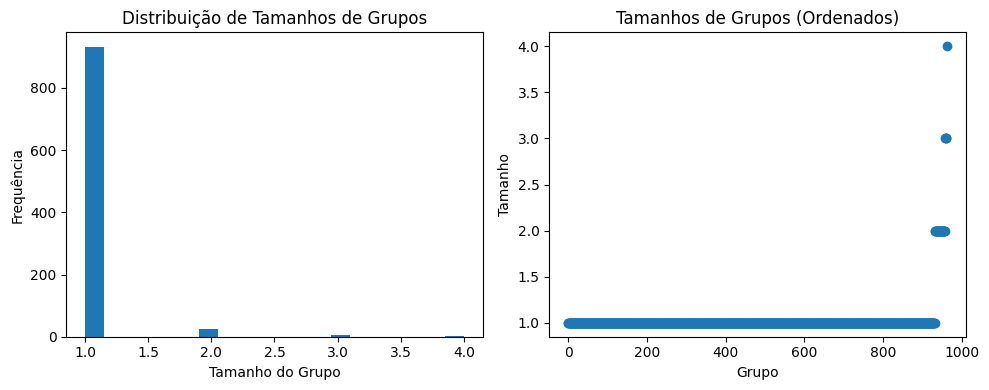

In [ ]:
def evaluate_semantic_hashing(encoder, x_data, y_data):
    # Gerar hashes
    hashes = generate_hash(encoder, x_data)

    # Converter hashes para strings para agrupamento
    hash_strings = [''.join(map(str, hash)) for hash in hashes]

    # Agrupar imagens por hash
    hash_groups = {}
    for i, hash_str in enumerate(hash_strings):
        if hash_str not in hash_groups:
            hash_groups[hash_str] = []
        hash_groups[hash_str].append((x_data[i], y_data[i]))

    # Calcular pureza dos grupos
    purities = []
    for hash_str, group in hash_groups.items():
        if len(group) > 1:
            labels = [y for _, y in group]
            unique_labels, counts = np.unique(labels, return_counts=True)
            purity = np.max(counts) / len(labels)
            purities.append(purity)

    avg_purity = np.mean(purities) if purities else 0
    return avg_purity, hash_groups

# Avaliar
purity, hash_groups = evaluate_semantic_hashing(encoder_clean, x_test[:1000], y_test[:1000])
print(f"Pureza m√©dia dos grupos: {purity:.3f}")
print(f"N√∫mero de grupos √∫nicos: {len(hash_groups)}")

# Visualizar alguns grupos - VERS√ÉO CORRIGIDA
def visualize_hash_groups(hash_groups, n_groups=3):
    # Filtrar apenas grupos com pelo menos 5 imagens
    valid_groups = {k: v for k, v in hash_groups.items() if len(v) >= 5}

    if not valid_groups:
        print("Nenhum grupo com pelo menos 5 imagens encontrado!")
        return

    n_groups = min(n_groups, len(valid_groups))
    fig, axes = plt.subplots(n_groups, 5, figsize=(15, 3*n_groups))

    # Se apenas 1 grupo, axes n√£o √© array 2D
    if n_groups == 1:
        axes = axes.reshape(1, -1)

    for i, (hash_str, group) in enumerate(list(valid_groups.items())[:n_groups]):
        for j in range(5):
            img, label = group[j]
            # Verificar formato da imagem
            if img.shape == (784,):  # MNIST flatten
                img = img.reshape(28, 28)
            elif len(img.shape) == 1:  # Qualquer formato flatten
                side = int(np.sqrt(img.shape[0]))
                img = img.reshape(side, side)

            axes[i, j].imshow(img, cmap='gray')
            axes[i, j].set_title(f'L: {label}')
            axes[i, j].axis('off')

        axes[i, 0].set_ylabel(f'Hash: {hash_str[:10]}...\nSize: {len(group)}',
                             fontsize=8, rotation=0, labelpad=40, va='center')

    plt.tight_layout()
    plt.show()

# VERIFICAR antes de visualizar
print("\nEstat√≠sticas dos grupos:")
for hash_str, group in list(hash_groups.items())[:5]:
    print(f"Hash {hash_str[:10]}...: {len(group)} imagens")

# Visualizar apenas se houver grupos v√°lidos
valid_groups = {k: v for k, v in hash_groups.items() if len(v) >= 5}
if valid_groups:
    print(f"\nVisualizando {min(3, len(valid_groups))} grupos com 5+ imagens...")
    visualize_hash_groups(hash_groups, n_groups=3)
else:
    print("Nenhum grupo com 5+ imagens para visualizar!")

    # Visualizar estat√≠sticas de tamanho de grupos
    group_sizes = [len(group) for group in hash_groups.values()]
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(group_sizes, bins=20)
    plt.title('Distribui√ß√£o de Tamanhos de Grupos')
    plt.xlabel('Tamanho do Grupo')
    plt.ylabel('Frequ√™ncia')

    plt.subplot(1, 2, 2)
    plt.scatter(range(len(group_sizes)), sorted(group_sizes))
    plt.title('Tamanhos de Grupos (Ordenados)')
    plt.xlabel('Grupo')
    plt.ylabel('Tamanho')

    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.model_selection import KFold

def cross_validate_semantic_hashing(x_data, y_data, n_splits=3):
    kf = KFold(n_splits=n_splits)
    purities = []

    for train_idx, val_idx in kf.split(x_data):
        x_train_fold, x_val_fold = x_data[train_idx], x_data[val_idx]
        y_train_fold, y_val_fold = y_data[train_idx], y_data[val_idx]

        # Treinar autoencoder
        autoencoder, encoder = build_noisy_autoencoder(noise_std=0.3)
        autoencoder.fit(x_train_fold, x_train_fold,
                       epochs=20,  # Menos √©pocas para CV r√°pida
                       batch_size=256,
                       verbose=0)

        # Avaliar
        purity, _ = evaluate_semantic_hashing(encoder, x_val_fold, y_val_fold)
        purities.append(purity)

    return np.mean(purities)

# Testar diferentes hiperpar√¢metros
param_grid = {
    'noise_std': [0.1, 0.3, 0.5],
    'encoding_dim': [20, 30, 40],
    'learning_rate': [0.001, 0.0005]
}

best_purity = 0
best_params = {}

for noise in param_grid['noise_std']:
    for dim in param_grid['encoding_dim']:
        # Testar combina√ß√µes (implementa√ß√£o simplificada)
        purity = cross_validate_semantic_hashing(x_train[:5000], y_train[:5000])
        print(f"Noise: {noise}, Dim: {dim}, Purity: {purity:.3f}")

        if purity > best_purity:
            best_purity = purity
            best_params = {'noise_std': noise, 'encoding_dim': dim}

print(f"Melhores par√¢metros: {best_params}, Pureza: {best_purity:.3f}")

53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
Noise: 0.1, Dim: 20, Purity: 0.752
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
Noise: 0.1, Dim: 30, Purity: 0.699
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
Noise: 0.1, Dim: 40, Purity: 0.667
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

Resumo da arquitetura:


Model: "functional_94"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_99 (InputLayer)     ‚îÇ (None, 784)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ reshape_2 (Reshape)             ‚îÇ (None, 28, 28, 1)      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_5 (Conv2D)               ‚îÇ (None, 28, 28, 32)     ‚îÇ           320 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_2 (MaxPooling2D)  ‚îÇ (None, 14, 14, 32)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_6 (Conv2D)               ‚îÇ (None, 14, 14, 64)     ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_3 (MaxPooling2D)  ‚îÇ (None, 7, 7, 64)       ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_7 (Conv2D)               ‚îÇ (None, 7, 7, 64)       ‚îÇ        36,928 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_2 (Flatten)             ‚îÇ (None, 3136)           ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_274 (Dense)               ‚îÇ (None, 64)             ‚îÇ       200,768 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ hash_layer (Dense)              ‚îÇ (None, 30)             ‚îÇ         1,950 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_275 (Dense)               ‚îÇ (None, 10)             ‚îÇ           310 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 258,772 (1010.83 KB)

 Trainable params: 258,772 (1010.83 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 32ms/step - accuracy: 0.8558 - loss: 0.7511 - val_accuracy: 0.9714 - val_loss: 0.2443
Epoch 2/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 32ms/step - accuracy: 0.9759 - loss: 0.1630 - val_accuracy: 0.9858 - val_loss: 0.1020
Epoch 3/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 31ms/step - accuracy: 0.9844 - loss: 0.0887 - val_accuracy: 0.9858 - val_loss: 0.0735
Epoch 4/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 33ms/step - accuracy: 0.9876 - loss: 0.0622 - val_accuracy: 0.9897 - val_loss: 0.0487
Epoch 5/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 33ms/step - accuracy: 0.9899 - loss: 0.0462 - val_accuracy: 0.9886 - val_loss: 0.0469
Epoch 6/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 33ms/step - accuracy: 0.9924 - loss: 0.0350 - val_accuracy: 0.9904 - val

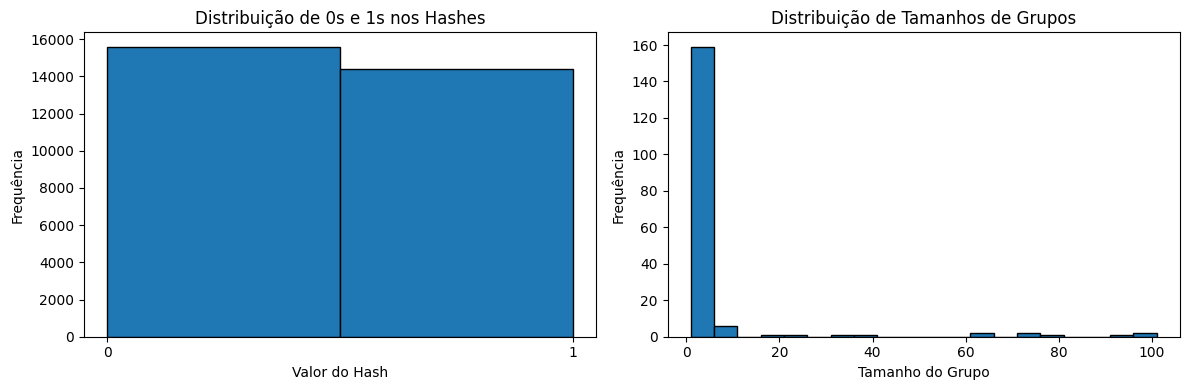

Compara√ß√£o de desemcentho:
Autoencoder: 0.694
CNN: 1.000


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_cnn_for_hashing(input_shape=(28, 28, 1), hash_dim=30):
    # CNN para classifica√ß√£o com camada de hash
    inputs = keras.Input(shape=(784,))  # Input shape correto para MNIST flatten

    # Reshape e camadas convolucionais
    x = layers.Reshape((28, 28, 1))(inputs)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)

    # Camada de hash (pen√∫ltima camada)
    hash_layer = layers.Dense(hash_dim, activation='sigmoid', name='hash_layer')(x)

    # Camada de classifica√ß√£o
    outputs = layers.Dense(10, activation='softmax')(hash_layer)

    # Modelo completo
    cnn = keras.Model(inputs=inputs, outputs=outputs)

    cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return cnn

# Dados de exemplo (MNIST)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0

# Treinar CNN
cnn = build_cnn_for_hashing()
print("Resumo da arquitetura:")
cnn.summary()

history = cnn.fit(x_train, y_train,
                  epochs=10,  # Reduzido para teste r√°pido
                  batch_size=256,
                  validation_data=(x_test, y_test),
                  verbose=1)

# Extrair modelo para gera√ß√£o de hashes
hash_extractor = keras.Model(inputs=cnn.inputs,
                           outputs=cnn.get_layer('hash_layer').output)

def generate_cnn_hash(model, data):
    # Garantir que os dados est√£o no formato correto
    if len(data.shape) == 3:  # Se for (samples, 28, 28)
        data = data.reshape(-1, 784)
    elif data.shape[1] != 784:  # Se n√£o estiver flatten
        data = data.reshape(-1, 784)

    hashes = model.predict(data, verbose=0)
    return np.round(hashes).astype(int)

# Avaliar hashes da CNN
cnn_hashes = generate_cnn_hash(hash_extractor, x_test[:1000])

# Fun√ß√£o evaluate_semantic_hashing corrigida
def evaluate_semantic_hashing(hashes, x_data, y_data):
    # Converter hashes para strings para agrupamento
    hash_strings = [''.join(map(str, hash)) for hash in hashes]

    # Agrupar imagens por hash
    hash_groups = {}
    for i, hash_str in enumerate(hash_strings):
        if hash_str not in hash_groups:
            hash_groups[hash_str] = []
        hash_groups[hash_str].append((x_data[i], y_data[i]))

    # Calcular pureza dos grupos
    purities = []
    for hash_str, group in hash_groups.items():
        if len(group) > 1:  # S√≥ considerar grupos com mais de 1 elemento
            labels = [y for _, y in group]
            unique_labels, counts = np.unique(labels, return_counts=True)
            purity = np.max(counts) / len(labels)
            purities.append(purity)

    avg_purity = np.mean(purities) if purities else 0
    return avg_purity, hash_groups

# Avaliar
cnn_purity, cnn_hash_groups = evaluate_semantic_hashing(cnn_hashes, x_test[:1000], y_test[:1000])
print(f"Pureza da CNN: {cnn_purity:.3f}")

# Estat√≠sticas dos hashes
unique_hashes = len(set([''.join(map(str, h)) for h in cnn_hashes]))
print(f"Hashes √∫nicos gerados: {unique_hashes}/1000")
print(f"Taxa de colis√£o: {(1000 - unique_hashes)/10:.1f}%")

# Visualizar distribui√ß√£o dos hashes
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Distribui√ß√£o dos valores de hash (0s e 1s)
hash_values = cnn_hashes.flatten()
plt.subplot(1, 2, 1)
plt.hist(hash_values, bins=2, edgecolor='black')
plt.title('Distribui√ß√£o de 0s e 1s nos Hashes')
plt.xlabel('Valor do Hash')
plt.ylabel('Frequ√™ncia')
plt.xticks([0, 1])

# Tamanho dos grupos
group_sizes = [len(group) for group in cnn_hash_groups.values()]
plt.subplot(1, 2, 2)
plt.hist(group_sizes, bins=20, edgecolor='black')
plt.title('Distribui√ß√£o de Tamanhos de Grupos')
plt.xlabel('Tamanho do Grupo')
plt.ylabel('Frequ√™ncia')

plt.tight_layout()
plt.show()

# Comparar com autoencoder (se dispon√≠vel)
try:
    print("Compara√ß√£o de desemcentho:")
    print(f"Autoencoder: {purity:.3f}")  # Vari√°vel do autoencoder anterior
    print(f"CNN: {cnn_purity:.3f}")
except NameError:
    print("Pureza da CNN:", cnn_purity)

#### 10. Treine um autoencoder variacional no conjunto de dados da imagem utilizado nos exerc√≠cios anteriores (MNIST) e fa√ßa com que ele gere imagens. como alternativa, tente encontrar um conjunto de dados n√£o rotulados do seu interesse e veja se √© poss√≠vel gerar novas amostras.

Epoch 1/50
469/469 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 20ms/step - kl_loss: 2.0793 - loss: 213.6579 - reconstruction_loss: 211.5786
Epoch 2/50
469/469 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 20ms/step - kl_loss: 2.1372 - loss: 188.0563 - reconstruction_loss: 185.9191
Epoch 3/50
469/469 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 20ms/step - kl_loss: 3.5703 - loss: 171.7582 - reconstruction_loss: 168.1878
Epoch 4/50
469/469 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 20ms/step - kl_loss: 3.6924 - loss: 164.7661 - reconstruction_loss: 161.0737
Epoch 5/50
469/469 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 20ms/step - kl_loss: 3.8696 - loss: 161.0687 - reconstruction_loss: 157.1992
Epoch 6/50
469/469 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 21ms/step - kl_loss: 3.9846 - loss: 158.4763 - reconstruction_loss: 154.4917
Epoch 7/50
469/469 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

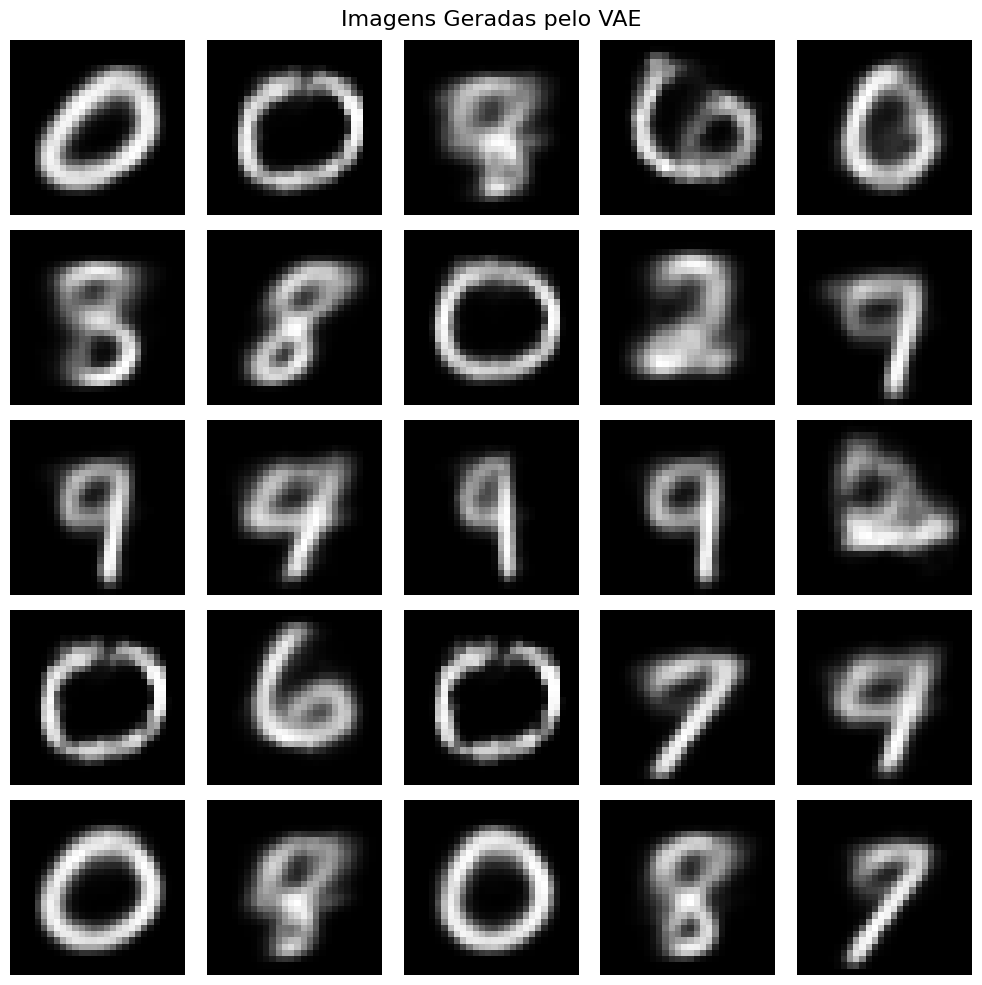

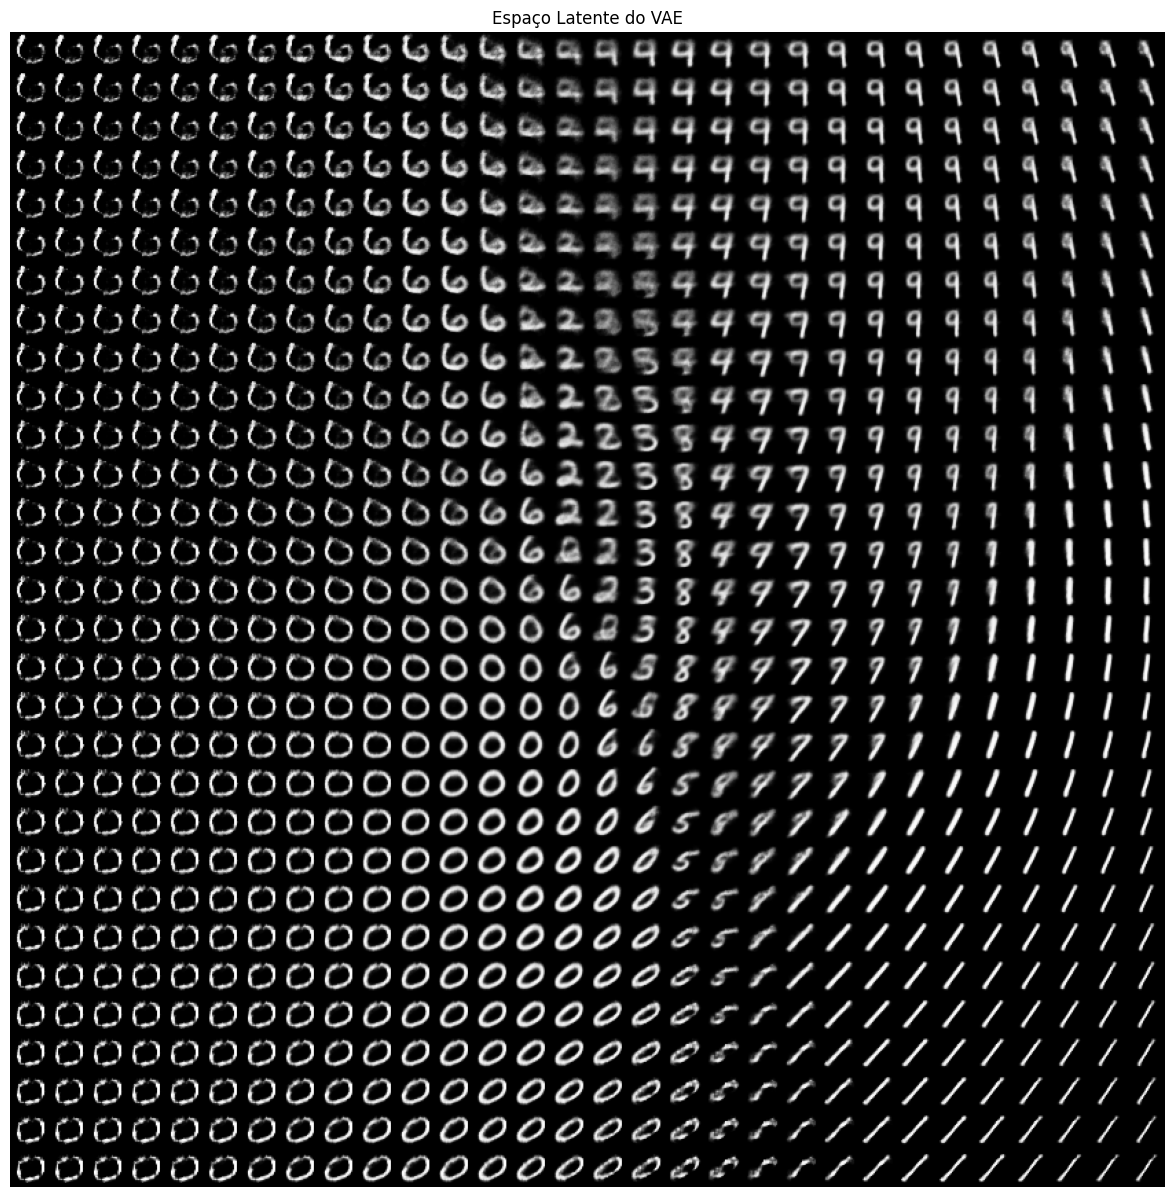

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Carregar e preparar dados MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Par√¢metros do VAE
latent_dim = 2  # Espa√ßo latente 2D para f√°cil visualiza√ß√£o
batch_size = 128
epochs = 50

# Construir encoder
encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)

# Camadas de m√©dia e vari√¢ncia
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

# Camada de amostragem
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = Sampling()([z_mean, z_log_var])

# Modelo encoder
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

# Construir decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)

# Modelo decoder
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

# Modelo VAE completo
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)

            # Loss de reconstru√ß√£o
            reconstruction_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            reconstruction_loss *= 28 * 28  # Escalar

            # Loss KL
            kl_loss = -0.5 * tf.reduce_mean(
                z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1
            )

            # Loss total
            total_loss = reconstruction_loss + kl_loss

        gradients = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

# Compilar e treinar VAE
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(x_train, epochs=epochs, batch_size=batch_size)

# üé® Gerar novas imagens
def generate_images(model, n_images=10):
    # Gerar pontos aleat√≥rios no espa√ßo latente
    random_latent_vectors = tf.random.normal(shape=(n_images, latent_dim))

    # Decodificar para gerar imagens
    generated_images = model.decoder(random_latent_vectors)

    return generated_images.numpy()

# Gerar e visualizar imagens
generated_imgs = generate_images(vae, n_images=25)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(generated_imgs[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.suptitle('Imagens Geradas pelo VAE', fontsize=16)
plt.tight_layout()
plt.show()

# üìä Visualizar espa√ßo latente
def plot_latent_space(model, n=30, figsize=15):
    # Grid no espa√ßo latente
    grid_x = np.linspace(-3, 3, n)
    grid_y = np.linspace(-3, 3, n)[::-1]

    figure = np.zeros((28 * n, 28 * n))

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = model.decoder.predict(z_sample, verbose=0)
            digit = x_decoded[0].reshape(28, 28)
            figure[i * 28: (i + 1) * 28, j * 28: (j + 1) * 28] = digit

    plt.figure(figsize=(figsize, figsize))
    plt.imshow(figure, cmap='Greys_r')
    plt.title("Espa√ßo Latente do VAE")
    plt.axis('off')
    plt.show()

plot_latent_space(vae)